# Homework 1 Clustering and Regression

## import relevant library

In [381]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import os

## 1. Clustering
Using K-means clustering technique to cluster the given samples and answer the questions.

Setting up the samples

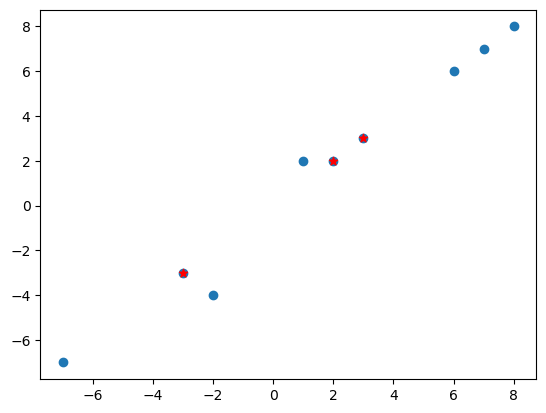

In [382]:
x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7], dtype=float)
y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7], dtype=float)
clusterTag = ['green', 'blue', 'orange']
dataClusterTag = np.ones(9, dtype=int)
plt.scatter(x, y)

#init centroid 1
cX = np.array([3, 2, -3], dtype=float)
cY = np.array([3, 2, -3], dtype=float)
#init centroid 2
# cX = np.array([-3, -2, -7], dtype=float)
# cY = np.array([-3, -2, -7], dtype=float)

plt.scatter(cX, cY, marker='*', c='red', linewidths=1)
delta = [[] for a in range(len(cX))]
convergenceCounter = 0

### K-means clustering script

Centroids are: 


C:\Users\latta\AppData\Local\Temp\ipykernel_19880\4199174204.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dataClusterTag[i] = int(np.where(distData[:, i] == min(distData[:, i]))[0])


['[7.00, 7.00]', '[2.00, 2.33]', '[-4.00, -4.67]']

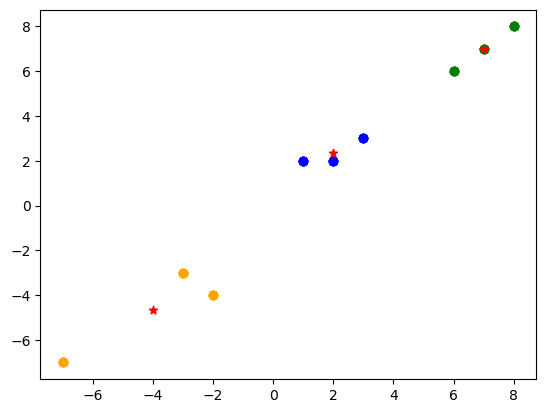

In [383]:
def euclideanDist(p1, p2):
    return np.sqrt(np.power((p2[1] - p1[1]), 2) + np.power((p2[0] - p1[0]), 2))

distData = np.zeros([3, len(x)], dtype=float)

#while loop
while(1):
    #Calculating the distance by using defined eublidean distance claculator
    #output: the distance array which has n row m cal (n: number of centroid, m number of samples) 
    for i in range(len(cX)):
        for j in range(len(x)):
            distData[i][j] = euclideanDist([cX[i], cY[i]], [x[j], y[j]])

    #Clustering based on current centroid
    for i in range(len(x)):
        dataClusterTag[i] = int(np.where(distData[:, i] == min(distData[:, i]))[0])
        plt.scatter(x[i], y[i], c=clusterTag[dataClusterTag[i]])

    #Calculating new centroid and calculating the changes in centroid as a euclidean distance
    for i in range(len(cX)):
        mem = (np.where(dataClusterTag == i)[0])
        cXn, cYn = sum(x[mem])/len(mem), sum(y[mem])/len(mem)
        delta[i].append(euclideanDist([cX[i], cY[i]], [cXn, cYn])) if len(delta[i]) == 0 else delta[i].append(0)
        cX[i], cY[i] = cXn, cYn

    #Counting the iteration of no change centroid position
    if np.array(delta)[:, -1].all() == 0.0: convergenceCounter += 1
    if convergenceCounter == 3: break

#Plot the centroids
plt.scatter(cX, cY, marker='*', c='red', linewidths=1)
#print the centroids
Centroids = [[cX[i], cY[i]] for i in range(len(cX))]
print("Centroids are: ")
["[{:.2f}, {:.2f}]".format(cX[i], cY[i]) for i in range(len(cX))]

### SKlearn verification

In [384]:
samples = [[x[i], y[i]] for i in range(len(x))]
inits = [[cX[i], cY[i]] for i in range(len(cX))]
kmeans = KMeans(n_clusters=3, init=inits, n_init="auto", max_iter=10).fit(samples)
print("Verifying centroids are:")
kmeans.cluster_centers_

Verifying centroids are:


d:\4thYear\secondSemester\Pattern Recognition\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 7.        ,  7.        ],
       [ 2.        ,  2.33333333],
       [-4.        , -4.66666667]])

## Explanation



### 1.1 Describing assign and update step

> Briefly, we assign the random centroid based on the avilable samples. Then, we will perform update and reassign centroids based on euclidean distance of each data and centroid. The steps are summarized as follow:
> 1. Assigning centroid's clusterTag (color)
> 2. Caculating the euclidean distance between each centroid and all of the samples. The result is the n rows m cols distance matrix which n is the number of centroid and m is the number of samples.
> 3. Finding the centroid which has minimum euclidean distance to each sample. Then, assign a centroidTag to that sample.
> 4. Recalculating mean value of x and y axis in each cluster to find the coordinate (x, y) of the new centroid.
> 5. Ploting the data for observing the centroid movement.
> 6. The process will loop until centroid coordinate is not changed for 3 times

### 1.2 What happen when the starting points are changed to (-3, -3), (2, 2), (-7, -7) 

>From attached scatter plot which achieved by using code above, we could observed that clusters formation are changed. The explaination are listed below:
> - Let's imagine that the area of a plot is divided into 4 sections by x = 0 and y = 0 line
> - coordinate (2, 2) is taking the top right area because it's a closest initialized centroid.
> - onces (2, 2) taking top right area already, in the middle coordinate (-3, -3) is the owner of center area
> - Lastly, with this initialization, coordinate (-7, -7) is not able to cluster with any other sample due to the influence of (-3, -3)

Initial point

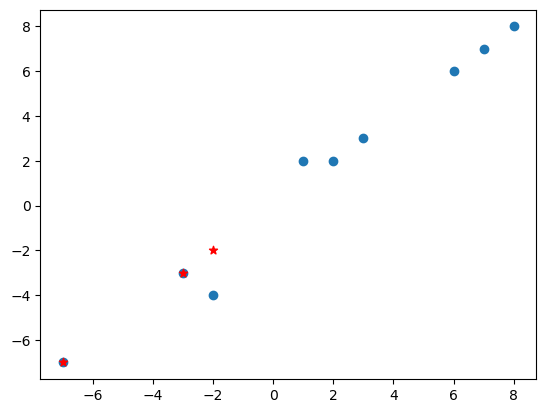

Clustering result

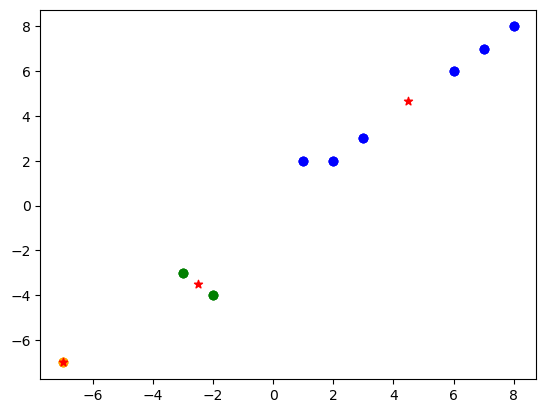

### 1.3 Which centroid initialization is good and why?

>  In my opinion, it's hard to say that it's good or bad centroid initilization because there are no rules in assigning centroids but "Good" or "Bad" cluster centroids could result in "Good" or "Bad" cluster from k-means clustering.

> Good and Bad custering could be explained by how clear the centroid can represent it's cluster. We could analyze it through several evaluation matrics such as between-cluster variance.

> In conclusion, we could explain that Good cnetroids initilization will result in the clear cluster representation from those centroids.

### 1.4 What would be the best K for this question? Describe your reasoning

Currently, we use a manual method to observe the best K for clustering. From samples, I will select 4 as the best number of clusters because it could be clearly seen that if the samples is separated to 4 cluster, the within-cluster variance will be very low.

However, to select the best method to finding the best K for this question we could select 2 metrics for proving the best K. Fraction of explained variance, using for finding the lower bound of K. On the other hand, within-cluster variance, using for finding the higher bound of K.

## 2. Regression
Using the Titanic Dataset from Kaggles for training a model which predict a chance to survive of the passengers on the ship. The used method are Logistic Regression and Linear regression.

### Importing train & test Titanic data set

In [385]:
trainFilePath = os.path.join('D:\\4thYear', 'secondSemester', 'Pattern Recognition', 'HW', 'HW1', 'dataset','train.csv')
testFilePath = os.path.join('D:\\4thYear', 'secondSemester', 'Pattern Recognition', 'HW', 'HW1', 'dataset','test.csv')

train = pd.read_csv(trainFilePath)
test = pd.read_csv(testFilePath)

### Data exploration

In [386]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [387]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Age distribution')

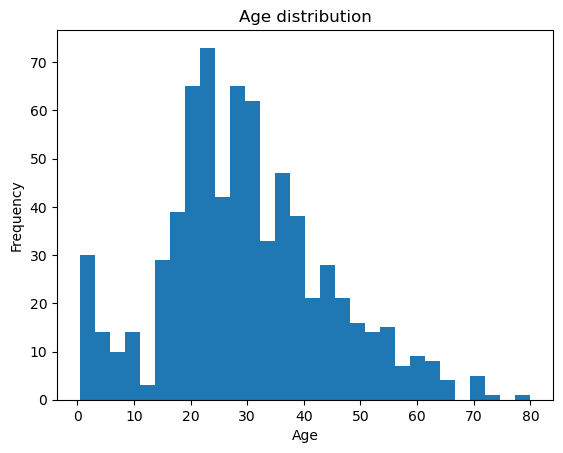

In [388]:
#Checking the distribution of weight data
plt.hist(train["Age"], rwidth=1, bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

### 2.2 Changing Embarked, Sex from string data to number
The Embarked and Sex data are categorical data which we change it's data type from string to int for using in our regression. However, we are able to do one hot encoding instead.

In [389]:
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

#Checking whether the non-numerical data done the substituions right or not
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


### 2.1 Fill age with mode
Since the distribution of age is slightly skew right, so mode is a good choice for fill NaN in the data because it can represent the majority of the data.

In [390]:
train["Age"] = train["Age"].fillna(train["Age"].mode()[0])
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

#Checking whether the NaN filling doing right or not
trainFiltered = train[["Pclass", "Sex", "Age", "Embarked"]].convert_dtypes()
trainFiltered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    Int64  
 1   Sex       891 non-null    Int64  
 2   Age       891 non-null    Float64
 3   Embarked  891 non-null    Int64  
dtypes: Float64(1), Int64(3)
memory usage: 31.4 KB


From our curiosity, we want to know which features has highest correlation to our target. So, we print out the correlation table of entire selected features to observe. We found that "Sex" has the highest correlation to our target (Survived)

In [391]:
#Exploring the correlation of the selected features to our target.
train[["Pclass", "Sex", "Age", "Embarked", "Survived"]].corr()

,Pclass,Sex,Age,Embarked,Survived
Pclass,1.000000,-0.131900,-0.356187,0.045702,-0.338481
Sex,-0.131900,1.000000,-0.073377,0.116569,0.543351
Age,-0.356187,-0.073377,1.000000,-0.047625,-0.052872
Embarked,0.045702,0.116569,-0.047625,1.000000,0.106811
Survived,-0.338481,0.543351,-0.052872,0.106811,1.000000


### Setting up the training dataset

In [392]:
#initilizing samples
x = np.array(trainFiltered.values, dtype = float)
y = train["Survived"].values
#initilizing learning rate
r = 0.001

nFeatures = len(x[0])
nSamples = len(x)

Data normalization by max min scaling

In [393]:
for i in range(nFeatures):
    minI = min(x[:, i])
    maxI = max(x[:, i])
    x[:, i] = (x[:, i] - minI)/(maxI - minI)

#Checking whether max min scaling can do it's job or not.
pd.DataFrame(x).describe()

,0,1,2,3
count,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.352413,0.353694,0.180696
std,0.418036,0.477990,0.165865,0.317837
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000
50%,1.000000,0.000000,0.296306,0.000000
75%,1.000000,1.000000,0.434531,0.500000
max,1.000000,1.000000,1.000000,1.000000


### 2.3 Writing a Logistic Regression for optimizing the parameters

The function which perform a model paramters optimization of a regression model for predicting a target data. 
During training there are prediction process and gradient decent calculation for tuning the parameters. Moreover,
this function is capable for using with higher order regression. This logistic regression is very straight foward
no learning rate decay (adaptive learning rate) and using constant epoch for performing training

In [394]:
def logisticRegression(trainingSet, groundTruth, order, epoch):
    '''
        Function parameters
        trainingSet: an numpy array which contains dataset for training
        groundTruth: an numpy array which contains a ground truth dataset.
        order: the desire regression order
        epoch: the number of iteration of training.
    '''
    #initilizing the parameters by the number of features, orders and another bias
    theta = np.ones(len(trainingSet[0])*order + 1)
    nFeatures = len(theta)
    crossEntropyLoss = []
    
    for a in range(epoch):
        regressionRes = np.zeros(len(trainingSet), dtype=float)
        #Calculating the result from regression with given order
        for i in range(order):
            trainingSetPowered = trainingSet**(i+1)
            thetaPowered = theta[0 + i*len(trainingSet[0]):len(trainingSet[0]) + i*len(trainingSet[0])]
            regressionRes += np.matmul(trainingSetPowered, thetaPowered.T)
        regressionRes = regressionRes + theta[nFeatures - 1]
        #Using Sigmoid function to convert the regression result to [0, 1] range
        yHat = 1/(1 + np.exp(-regressionRes))
        #Defining the target output
        y = np.array(groundTruth)

        #Parameter updating by using the equation derived from partial derivative of MSE with respect to each features
        buff = np.zeros(nFeatures)
        for od in range(order):
            for j in range(len(trainingSet[0])):
                for i in range(nSamples):
                    #Calculating the sum of error in prediction by looping every sample in each features and order
                    buff[j + len(trainingSet[0])*od] += (y[i] - yHat[i])*(trainingSet[i][j]**(od+1))
                    #The bias weight is calculated along with the first features of first order.
                    if od == 0 and j == 0:
                        buff[nFeatures - 1] += (y[i] - yHat[i])*1
                #Updating the parameter of features
                theta[j + len(trainingSet[0])*od] += r*buff[j + len(trainingSet[0])*od]
                #Updating the parameter of bias along with the first features of first order
                if od == 0 and j == 0:
                    theta[nFeatures - 1] += r*buff[nFeatures - 1]
        #Calculating the loss using cross crossentropy method
        crossEntropyLoss.append(-1*(1/nSamples)*(np.matmul(y, np.log(yHat)) + np.matmul(1-y, np.log(1-yHat))))
    
    plt.clf()
    plt.plot(crossEntropyLoss)
    plt.xlabel("Epoch")
    plt.ylabel("Log loss")
    plt.title("Logistic regression loss curve")

    print("Final loss: ", end='')
    print(crossEntropyLoss[-1])

    return theta

Final loss: 0.4581423170849287


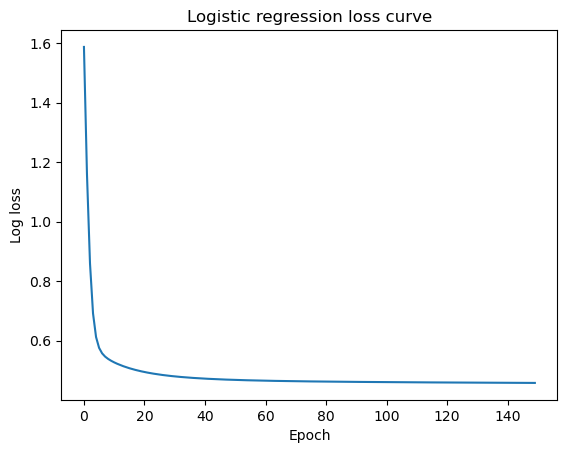

In [395]:
trainingEpoch = 150 ## ??How many epoch we need to use
theta = logisticRegression(x, train["Survived"], 1, trainingEpoch)

From visualized loss, we found that the loss of the model is nicely converge which we could observe and verify the parameters as shown below.

In [396]:
theta

array([-1.85838479,  2.57495138, -0.44636081,  0.61820964, -0.29933408])

The optimal parameters from self-written LogisticRegression function are

| $ \theta_{Embarked} $ | $ \theta_{Age} $ | $ \theta_{Sex} $ | $ \theta_{PClass} $ | $ \theta_0 $ |
|:---------------------:|:----------------:|:----------------:|:-------------------:|:------------:|
|0.618                  |-0.446            |2.565             |-1.858               |-0.299        |

Parameters verification by using SKlearn library

In [397]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x, y)

In [398]:
print(model.coef_, model.intercept_)

[[-2.13216765  2.47193257 -1.81943274  0.54369003]] [0.43296519]


The optimal parameters from self-written LogisticRegression function are

| $ \theta_{Embarked} $ | $ \theta_{Age} $ | $ \theta_{Sex} $ | $ \theta_{PClass} $ | $ \theta_0 $ |
|:---------------------:|:----------------:|:----------------:|:-------------------:|:------------:|
|0.543                  |-1.819            |2.472             |-2.132               |0.433         |

From parameters achieved by self written LogisticRegression function and SKlearn LogisticRegression, we found that the parameters of Sex features in both model has the highest weight which is related to the correlation observation at the beginning. So, I think, the output parameters is make sense.

### 2.4 Model evaluation

- $ Precision = \frac{True Positive}{True Positive + False Positive} $

- $ Recall = \frac{True Positive}{True Positive + False Negative} $

- $ f1-score = \frac{{2}\cdot{Precision}\cdot{Recall}}{{Precision}+{Recall}} $

In [399]:
#Gettign the prediction result from training dataset
survivingPrediction = 1/(1 + np.exp(-np.matmul(x, theta[0:4].T)))

#We could find the best threshold by changing the threshold and evaluating by AUROC
#However, threshold tuning need to do in valitation set but test in test set. In this case, we have only validation set, so we use 0.5.
# thresholdArr = np.linspace(start=0.3, stop=0.7, num=10)
threshold = 0.5

survivingPrediction[np.where(survivingPrediction >= threshold)] = 1
survivingPrediction[np.where(survivingPrediction < threshold)] = 0

def calPrecision(y, yHat):
    '''
    y = ground truth
    yHat = predicted result
    '''
    TP = np.count_nonzero(np.logical_and(y==1, yHat==1))
    FP = np.count_nonzero(np.logical_and(y==0, yHat==1))
    return TP/(TP + FP)

def calRecall(y, yHat):
    '''
    y = ground truth
    yHat = predicted result
    '''
    TP = np.count_nonzero(np.logical_and(y==1, yHat==1))
    FN = np.count_nonzero(np.logical_and(y==1, yHat==0))
    return TP/(TP + FN)

def calF1Score(precision, recall):
    return (2*precision*recall)/(precision+recall)

print("Evaluation matrics")
print("-------------------------------")

print("Precision: ", end='')
Precision = calPrecision(y, survivingPrediction)
print("{:.4f}".format(Precision))

print("Recall: ", end='')
Recall = calRecall(y, survivingPrediction)
print("{:.4f}".format(Recall))

print("F1-score: ", end='')
print("{:.4f}".format(calF1Score(Precision, Recall)))

Evaluation matrics
-------------------------------
Precision: 0.7106
Recall: 0.7251
F1-score: 0.7178


From the model evaluation result, it's showing that our model can:
- Predict the right "true" among every true predicted by 71.06%
- Predict the right "true" from every case that should be true by 72.51%
- Has F1-score at 0.7178

### 2.5 Adding some higher order features to the training 

Final loss: 0.45680459318818784


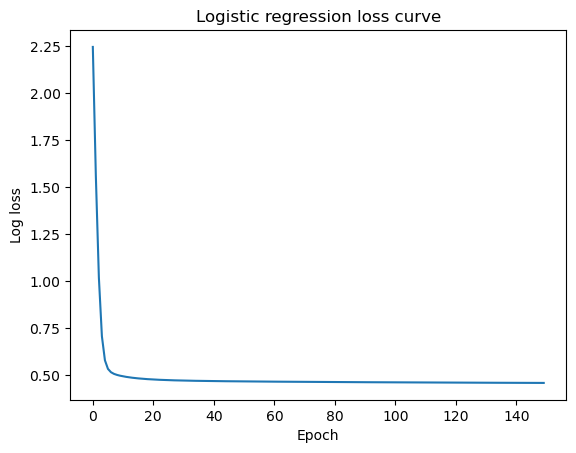

In [400]:
theta2order = logisticRegression(x, train["Survived"], 2, trainingEpoch)

In [408]:
x_2ndOrder = np.concatenate((x, x**2, np.ones(nSamples)[ :, np.newaxis]), axis=1)
# print(x_2ndOrder.shape)
#Gettign the prediction result from training dataset
survivingPrediction2 = 1/(1 + np.exp(-np.matmul(x_2ndOrder, theta2order.T)))
# print(theta2order)

#We could find the best threshold by changing the threshold and evaluating by AUROC
#However, threshold tuning need to do in valitation set but test in test set. In this case, we have only validation set, so we use 0.5.
# thresholdArr = np.linspace(start=0.3, stop=0.7, num=10)
threshold = 0.5

survivingPrediction2[np.where(survivingPrediction2 >= threshold)] = 1
survivingPrediction2[np.where(survivingPrediction2 < threshold)] = 0

print("Evaluation matrics")
print("-------------------------------")

print("Precision: ", end='')
Precision = calPrecision(y, survivingPrediction2)
print("{:.10f}".format(Precision))

print("Recall: ", end='')
Recall = calRecall(y, survivingPrediction2)
print("{:.10f}".format(Recall))

print("F1-score: ", end='')
print("{:.10f}".format(calF1Score(Precision, Recall)))

Evaluation matrics
-------------------------------
Precision: 0.7388535032
Recall: 0.6783625731
F1-score: 0.7073170732


Final loss: 0.4569387547804715


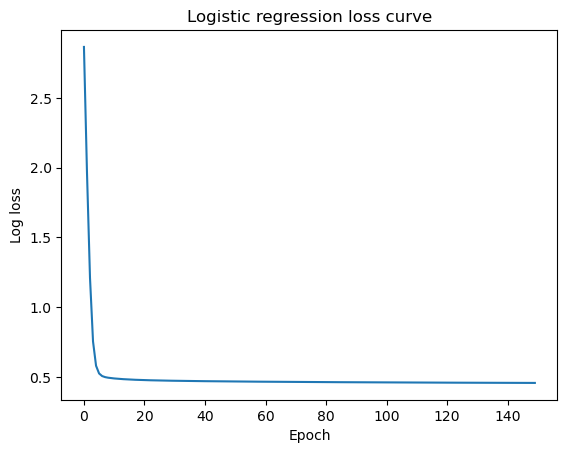

In [402]:
theta3order = logisticRegression(x, train["Survived"], 3, trainingEpoch)

In [409]:
x_3ndOrder = np.concatenate((x, x**2, x**3, np.ones(nSamples)[ :, np.newaxis]), axis=1)
# print(pd.DataFrame(x_3ndOrder).tail())
# print(x_3ndOrder.shape)
#Gettign the prediction result from training dataset
survivingPrediction3 = 1/(1 + np.exp(-np.matmul(x_3ndOrder, theta3order.T)))
# print(theta3order)

#We could find the best threshold by changing the threshold and evaluating by AUROC
#However, threshold tuning need to do in valitation set but test in test set. In this case, we have only validation set, so we use 0.5.
# thresholdArr = np.linspace(start=0.3, stop=0.7, num=10)
threshold = 0.5

survivingPrediction3[np.where(survivingPrediction3 >= threshold)] = 1
survivingPrediction3[np.where(survivingPrediction3 < threshold)] = 0

print("Evaluation matrics")
print("-------------------------------")

print("Precision: ", end='')
Precision = calPrecision(y, survivingPrediction3)
print("{:.10f}".format(Precision))

print("Recall: ", end='')
Recall = calRecall(y, survivingPrediction3)
print("{:.10f}".format(Recall))

print("F1-score: ", end='')
print("{:.10f}".format(calF1Score(Precision, Recall)))

Evaluation matrics
-------------------------------
Precision: 0.7388535032
Recall: 0.6783625731
F1-score: 0.7073170732


From the model which we increased the order to 2nd and 3rd order, we found that the result of our evaluation metrics in 1st order and 2nd order has a increase in precision, decrease in recall and f1-score. But, from 2nd order to 3rd order has no change in evaluation metrics. This doesn't means that the evalution metrics is wrong, because when we observed the final loss and parameters of the model in training process, we found a little differences. This implies that in this dataset, increasing the order of the model has no impact on model performance.

### 2.6 Reducing the features to Age and Sex

Final loss: 0.5149675769273415


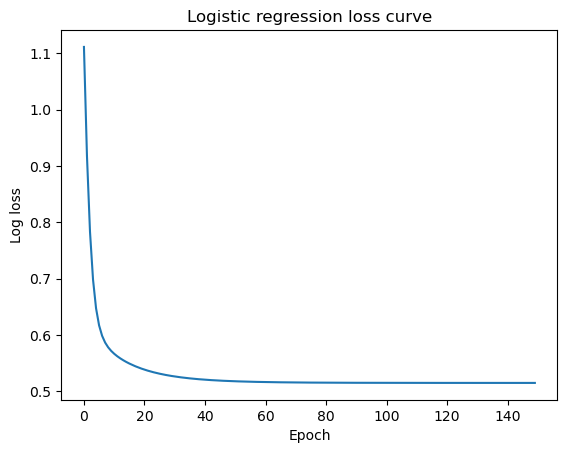

In [404]:
#Checking whether the NaN filling doing right or not
trainFiltered2 = train[["Sex", "Age"]].convert_dtypes()

#initilizing samples
x2 = np.array(trainFiltered2.values, dtype = float)
y = train["Survived"].values

#initilizing learning rate
r = 0.001

nFeatures2 = len(x2[0])
nSamples2 = len(x2)

for i in range(nFeatures2):
    minI = min(x2[:, i])
    maxI = max(x2[:, i])
    x2[:, i] = (x2[:, i] - minI)/(maxI - minI)

pd.DataFrame(x2).describe()

theta2 = logisticRegression(x2, train["Survived"], 1, trainingEpoch)

In [410]:
x2 = np.concatenate((x2, np.ones(nSamples)[ :, np.newaxis]), axis=1)
# print(pd.DataFrame(x_3ndOrder).tail())
# print(x_3ndOrder.shape)
#Gettign the prediction result from training dataset
survivingPrediction4 = 1/(1 + np.exp(-np.matmul(x2, theta2.T)))
# print(theta3order)

#We could find the best threshold by changing the threshold and evaluating by AUROC
#However, threshold tuning need to do in valitation set but test in test set. In this case, we have only validation set, so we use 0.5.
# thresholdArr = np.linspace(start=0.3, stop=0.7, num=10)
threshold = 0.5

survivingPrediction4[np.where(survivingPrediction4 >= threshold)] = 1
survivingPrediction4[np.where(survivingPrediction4 < threshold)] = 0

print("Evaluation matrics")
print("-------------------------------")

print("Precision: ", end='')
Precision = calPrecision(y, survivingPrediction4)
print("{:.10f}".format(Precision))

print("Recall: ", end='')
Recall = calRecall(y, survivingPrediction4)
print("{:.10f}".format(Recall))

print("F1-score: ", end='')
print("{:.10f}".format(calF1Score(Precision, Recall)))

Evaluation matrics
-------------------------------
Precision: 0.7420382166
Recall: 0.6812865497
F1-score: 0.7103658537


### 2.7 Using Linear Regression instead
showing
- weights
- MSE (loss of train/test set)

Linear regression weight: 
[-0.37651381  0.49301968 -0.38038878  0.09027745  0.57467839]


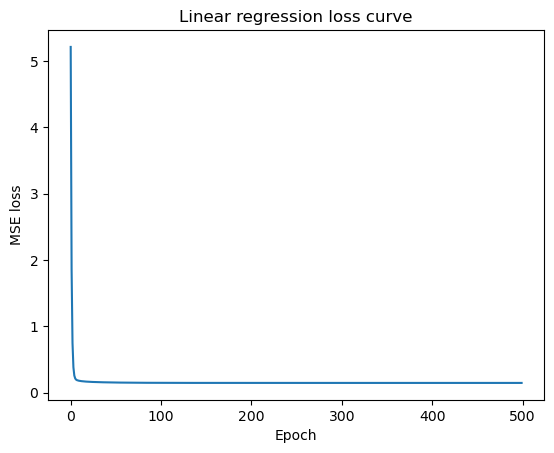

In [405]:
def linearRegression(trainingSet, groundTruth, order, epoch):
    #initilizing the parameters by the number of features, orders and another bias
    theta = np.ones(len(trainingSet[0])*order + 1)
    nFeatures = len(theta)
    mseLoss = []
    
    for a in range(epoch):
        yHat = np.zeros(len(trainingSet), dtype=float)
        #Calculating the result from regression with given order
        for i in range(order):
            trainingSetPowered = trainingSet**(i+1)
            thetaPowered = theta[0 + i*len(trainingSet[0]):len(trainingSet[0]) + i*len(trainingSet[0])]
            yHat += np.matmul(trainingSetPowered, thetaPowered.T)
        yHat = yHat + theta[nFeatures - 1]
        # print(yHat)
        #Defining the target output
        y = np.array(groundTruth)

        #Parameter updating by using the equation derived from partial derivative of MSE with respect to each features
        buff = np.zeros(nFeatures)
        for od in range(order):
            for j in range(len(trainingSet[0])):
                for i in range(nSamples):
                    buff[j + len(trainingSet[0])*od] += (y[i] - yHat[i])*(trainingSet[i][j]**(od+1))
                    if od == 0 and j == 0:
                        buff[nFeatures - 1] += (y[i] - yHat[i])*1
                #Updating the theta
                theta[j + len(trainingSet[0])*od] += r*buff[j + len(trainingSet[0])*od]
                if od == 0 and j == 0:
                    theta[nFeatures - 1] += r*buff[nFeatures - 1] 
        #Initial test by run the cell several times to observe the loss (Which loss function need to be used for this observation)
        mseLoss.append((1/nSamples)*sum((y - yHat)**2))
    
    plt.clf()
    plt.plot(mseLoss)
    plt.xlabel("Epoch")
    plt.ylabel("MSE loss")
    plt.title("Linear regression loss curve")

    return theta

thetaLinear = linearRegression(x, train["Survived"], 1, 500)
print("Linear regression weight: ")
print(thetaLinear)

### 2.8 Using Matrix inversion to find thetaLinear2

In [406]:
biasArr = np.ones(nSamples)
xMod = np.concatenate((x, biasArr[ :, np.newaxis]), axis=1)
thetaLinear2 = np.linalg.inv(xMod.T @ xMod) @ xMod.T @ train["Survived"].values
thetaLinear2

array([-0.37657417,  0.49299994, -0.3806769 ,  0.09027122,  0.57483068])

From 2.7, and 2.8 it's showed that Matrix inversion method can give the same parameters as the iterative gradient decent method, so those parameters are optimal.

### Listed Questions
- Why linear regression is fitted so fast?
- What is cross validation and why it's able to detect over fitting?
- Cross validation vs train test splitting, which method is better for dectecting overfitting?
- Why logLoss (Cross entropy) is needed in logistics regression?